<a href="https://colab.research.google.com/github/marianna13/Notebooks/blob/master/Predict%20Credit%20Approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict Credit Approval
This notebook shows how to predict whether someone will have credit approval or not. I used dataset provided by UCI: https://archive.ics.uci.edu/ml/datasets/credit+approval

Hope you will like it!

Marianna.

In [62]:
import pandas as pd
url = 'https://datahub.io/machine-learning/credit-approval/r/credit-approval.csv'
data = pd.read_csv(url)
# take a look at the data
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,class
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


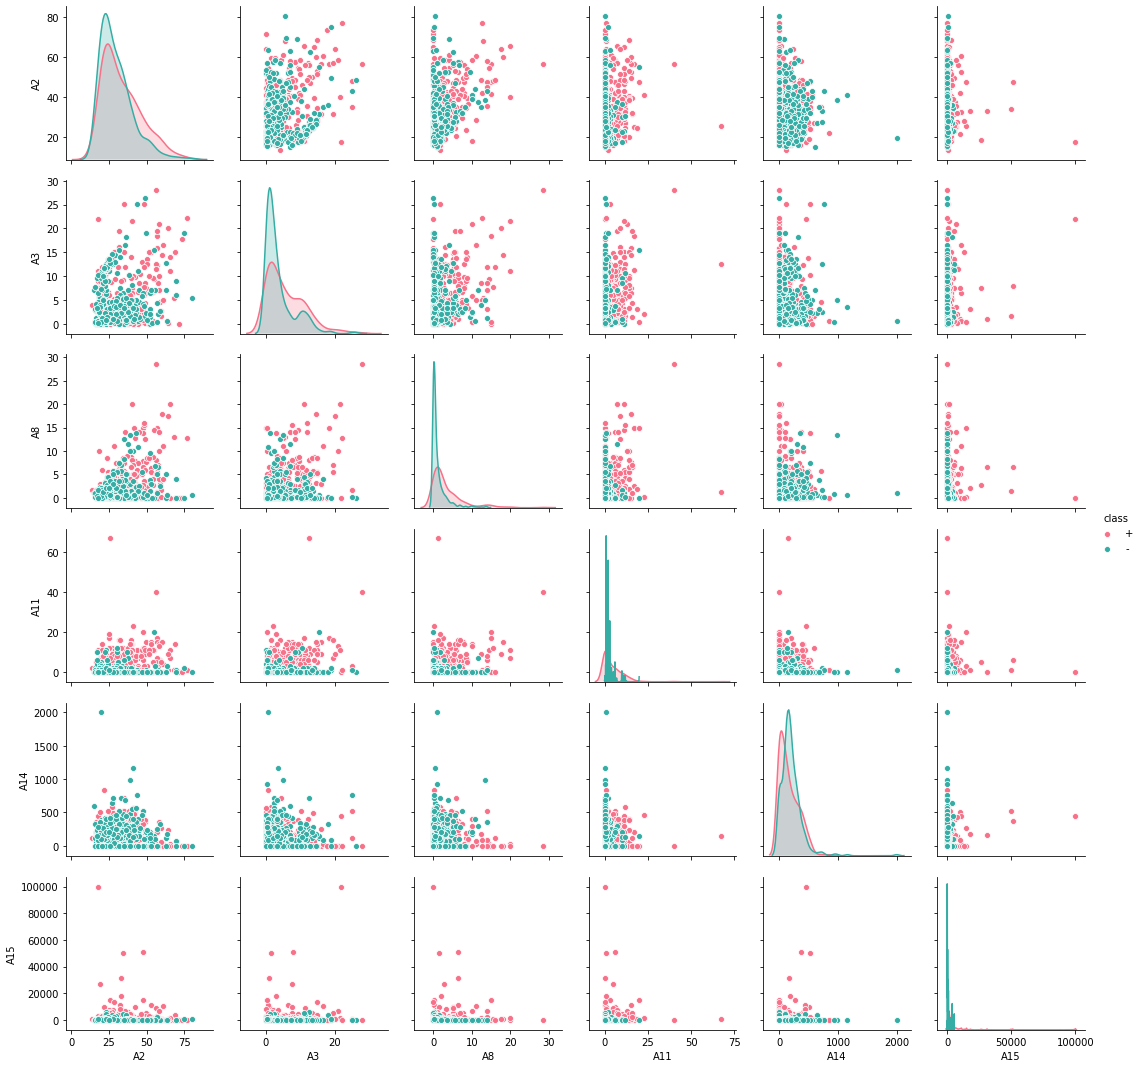

In [54]:
# visualize our data
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(data, hue="class", palette="husl")

In [0]:
# also we need to scale our data to feed it to the classifier
# we need to scale only numerical values and not categorical, so we scale columns with only numerical values
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler()
num_cols = data.columns[data.dtypes.apply(lambda c: np.issubdtype(c, np.number))]
data[num_cols] = scaler.fit_transform(data[num_cols])

In [64]:
# convert categorical data to numerical using ine-hot encoding
data = pd.get_dummies(data)
data.head()

,A2,A3,A8,A11,A14,A15,A1_a,A1_b,A4_l,A4_u,A4_y,A5_g,A5_gg,A5_p,A6_aa,A6_c,A6_cc,A6_d,A6_e,A6_ff,A6_i,A6_j,A6_k,A6_m,A6_q,A6_r,A6_w,A6_x,A7_bb,A7_dd,A7_ff,A7_h,A7_j,A7_n,A7_o,A7_v,A7_z,A9_f,A9_t,A10_f,A10_t,A12_f,A12_t,A13_g,A13_p,A13_s,class_+,class_-
0,-0.061777,-0.956613,-0.291083,-0.288101,0.103555,-0.195413,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,1,0,0,1,0
1,2.268118,-0.060051,0.244190,0.740830,-0.811931,-0.087852,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,1,0
2,-0.591526,-0.856102,-0.216324,-0.493887,0.552661,-0.037144,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,1,0,0,1,0
3,-0.312843,-0.647038,0.456505,0.535044,-0.483738,-0.194837,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,0,0,1,0
4,-0.953898,0.174141,-0.153526,-0.493887,-0.368582,-0.195413,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,1,1,0


In [65]:
# look at how many missing values we have
data.isna().sum().sum()

25

In [66]:
# we have not many NANs in our data so we can just drop them from the dataset
data.dropna(1,inplace=True)
data.isna().sum().sum()

0

We will use Sklearn's MultiOutputClassifier to predict two classes:

In [67]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.multioutput import MultiOutputClassifier

# last 2 columns are the target and others are labels
X, y = data.loc[:,'A3':'A13_s'], data.loc[:,'class_+': ]

# split labels and targets into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# define model and fit training data
xgb = MultiOutputClassifier(XGBClassifier())
xgb.fit(X_train, y_train)

# make preductions and evaluate model
y_pred = xgb.predict(X_test)
print('Accuracy of the model: {}'.format(round(accuracy_score(y_test, y_pred),2)))

Accuracy of the model: 0.85
